<a href="https://colab.research.google.com/github/phalves/DataRegulationSandbox/blob/master/Sandboxing_Open_Banking_Scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Simulation Scenarios to Mitigate Information Asymmetry Under a Data Regulation Perspective - Open Banking Scenario

### Scenario Description: Open Banking

Open banking is a practice of enabling data sharing between financial institutions. This practice allowed banking interoperability by APIs (Application Programming Interfaces). For example, the data subject can request a credit card from bank A, a financial loan from bank B, and buy assets from bank C. Moreover, open banking allows, for instance, the data subject to open an account just requesting his/her data from an institution that he/she has an account previously. Therefore, open banking turns the data sharing more agile, transparent, and secure for providing resources to the data subject chose: (i) which data he/she wants to share; (ii) when; (iii) how long, and (iv) with whom he/she wants to share.

According to indicators presented by [Open Banking Implementation Entity (OBIE)](https://www.openbanking.org.uk/api-performance/), since 2020, the number of successful API calls per month raised from 400.000 in May to more than 1.000.000 in 2022. It corresponds to an increase of 250% in two years. Moreover, the number of successful payments per month raised from 280 in July 2020 to more than 520.000 in May 2022.
They are some indicators that can demonstrate the evolution of open banking in the UK.

This sandbox seeks to provide an experimentation environment to the actors involved, i.e., Data Subjects, Controllers, and Processors. This environment was developed in Python based on the documentation supplied by [OBIE](https://www.openbanking.org.uk/about-us/). OBIE creates software standards and industry guidelines to drive competition, innovation, and transparency in UK retail banking.

Furthermore, this sandbox was developed based on [PrOnto](https://link.springer.com/chapter/10.1007/978-3-319-98349-3_11) and [GConsent](https://link.springer.com/chapter/10.1007/978-3-030-21348-0_18). They are ontologies for General Data Protection Regulation (GDPR). As the Brazilian Data Protection Regulation ([LGPD](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/L13709.htm)) presents many similar aspects to GDPR, this sandbox applied these ontologies concepts in an open banking scenario ruled by LGPD. Some ontology concepts were extented to allow a more accurate explanation regarding the consequences of the actors' actions.

To know more about OpenBanking:
- [OpenBanking Brazil](https://openbankingbrasil.org.br/)
- [OpenBanking and GDPR](https://standards.openbanking.org.uk/operational-guidelines/tpp-operational-guidelines/data-privacy-gdpr/v3-1-5/)


 ---------

This sandbox follows the class diagram depicted below, and the classes will be detailed and explained in the next steps.
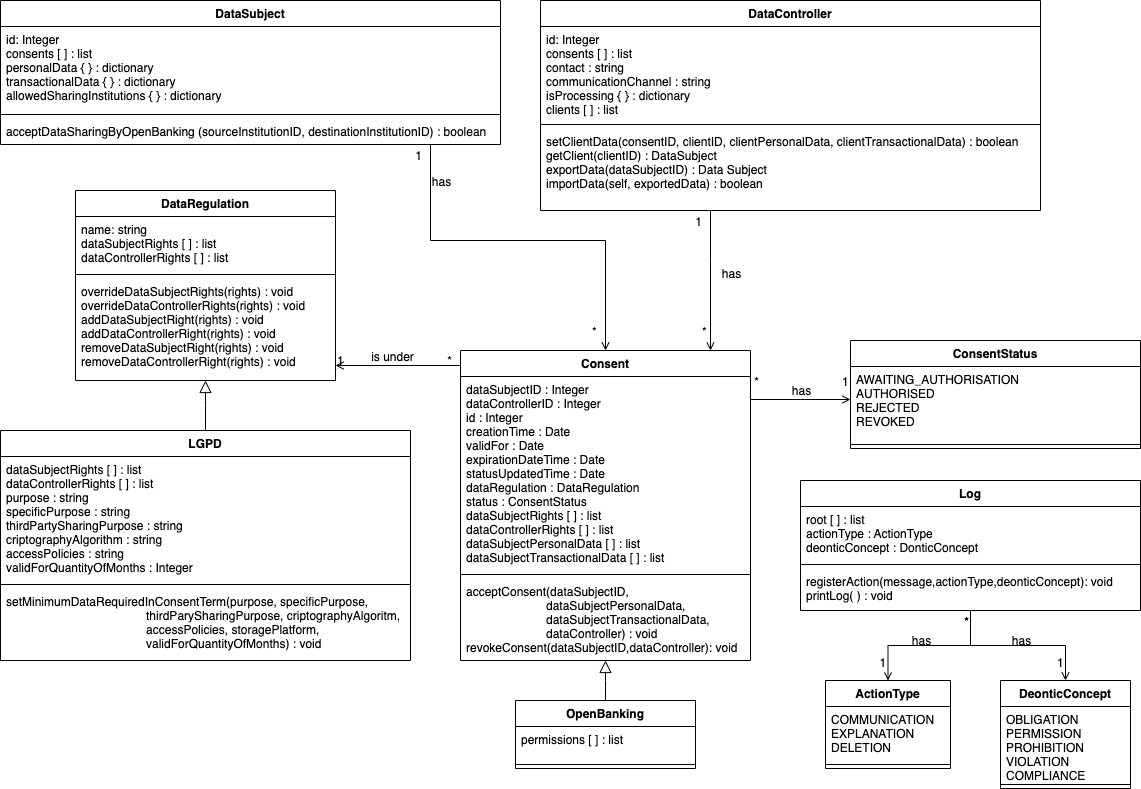

In order to provide a history of actions, the following code provides the structure to generate an action log based on the Consent Ontology.

In [1]:
# These libraries are used to manipulate dates 
from datetime import date, datetime 

class Log:
  # Action Types
  COMMUNICATION = 'Communication'
  EXPLANATION = 'Explanation'
  DELETION = 'Deletion'

  # Deontic Concepts
  OBLIGATION = 'Obligation'
  PERMISSION = 'Permission'
  PROHIBITION = 'Prohibition'
  VIOLATION = 'Violation'
  COMPLIANCE = 'Compliance'

  def __init__(self):
    #empty log
    self.root = ['Date; Event; Type; Deontic Concept']
    self.filePersistence = False
    

  def configLogPersistence(self,_fileName):
    if _fileName!='':
      self.filePersistence = True
      
      #open file
      self.file = open(_fileName, "w")

    else:
      print('There is no fileName, so the file will not be generated')
  
  def registerAction(self,message,actionType,deonticConcept):
    date = datetime.today()
    message = message
    actionType = actionType
    deonticConcept = deonticConcept
    self.root.append(str(date)+'; '+str(message)+'; '+str(actionType)+';  '+str(deonticConcept))

    if self.filePersistence==True:
      self.file.write(self.root[-1]) # Save the most recent action

  def printLog(self):
    for action in self.root:
      print(action)


The code below creates an instance of the log class, and it will be used in the next scenes to persist the log of actions performed by the actors.

In [2]:
log = Log()

### Creating Actors
In order to prepare the environment for exploring a data regulation, first we need to create the actors that will perform actions in our sandbox.

#### Data Subject
The first actor is the Data Subject. For this actor, we will will define the following data structure:
- Data Subject ID, i.e., an identification number
- Data Subject Consent List, i.e., a list of consents available for the Data Subject
- Data Subject Personal Data, i.e., a dictionary of personal data, e.g., (name: Mark)
- Data Subject Transactional Data, i.e., a dictionary of financial data, e.g., (Account Balance: 250,00)
- Data Subject Allowed Institutions, i.e., the financial institutions that the Data Subject agree to share its financial data



In [3]:
class DataSubject:
  def __init__(self,id):
    self.id = id                 # Identification Number
    self.consents = []           # Empty list of consents
    self.personalData = {}       # Dictionary of Personal Data
    self.transactionalData = {}  # Dictionary of Transactional Data
    self.allowedInstutions = {}  # Dictionary SourceInstitution: DestinationInstitution
  
  # Accept Data Sharing
  # This function aims to record the data subject wills regarding data sharing.
  # This function expects the Source Instittution ID and the Destination InstitutionID
  def acceptDataSharingByOpenBanking(self, sourceInstitutionID, destinationInstitutionID):
    if self.allowedInstutions.get(sourceInstitutionID) == destinationInstitutionID:
      return None
    else:
      self.allowedInstutions[sourceInstitutionID] = destinationInstitutionID
      return True

Now, we can create the person Mark. His ID is 35512367800.

In [4]:
mark = DataSubject('35512367800')
mark.personalData = {'name':'Mark','email':'mark@mail.com','cellphone':'+1 98638293756'}

Now, let's insert the Mark's transactional data

In [5]:
mark.transactionalData = {'Account Balance':250,
                           'Credit Card Type':'Platinum',
                           'Limit':5000, 
                           'Transactions':{'supermarket':300,
                                           'library':700,
                                           'drugstore':100}}

You can verify if Mark was created correctly by printing his data

In [6]:
print('ID:')
print(mark.id)

print('\n')

print('Consents:')
print(len(mark.consents))

ID:
35512367800


Consents:
0


As expected, there is no consent associated to Mark for a while.

#### Data Controller
For this actor, we will will define the following data structure:
- Data Controller ID, i.e., an identification number
- Data Controller Consent List, i.e., a list of consents issued by the Data Controller
- Data Controller Contact, i.e., an address or other information that allow the Data Subject to send questions and requests.
- Data Controller Communication Channel, i.e., the means that the Data Subject can contact the Data Controller.
- A dictionary where the dict key represents the Data Subject ID and the dict value represents a boolean (**true** or **false**) to indicate if the Data Controller is processing or not information from the Data Subject. If a dict key presents **no value**, it means the Data Controller never processed the Data Subject information. If a dict key presents a **'false'** value, it means that the Data Controller processed the information in the past, but now it is not processing anymore. Last but not least, if a dict key presents the a **'true'** value, it means that the Data Controller is processing the Data Subject information.
- List of Clients, i.e., a list of Data Subjects that agreed with the Data Controller consent term directly, or through the open banking functions

In [7]:
class DataController:
  def __init__(self,id,contact,communiactionChannel):
    self.id = id
    self.consents = []
    self.contact = contact
    self.communiactionChannel = communiactionChannel
    self.isProcessing = {} #Dictionary DataSubjectID:Boolean
    self.clients = []

  # Set Client Data
  # This function aims to store personal and transactional data from the Data Subject.
  # This function expects the consentID which demonstrates that the data subject agreed with the consent term,
  #  ClientID, i.e., the client identification
  #  ClientPersonalData, i.e., the client personal data
  #  ClientTransactionalData, i.e., the client transactional data
  # This function returns False if the consent presents the status different of Authorized,
  #  and True otherwise
  def setClientData(self, consentID, clientID, clientPersonalData, clientTransactionalData):
    for consent in self.consents:
      if consent.id == consentID:
        if consent.status != 'Authorised':
          log.registerAction('Data Controller is not allowed to get the Data Subject information',log.EXPLANATION,log.PROHIBITION)
          return False
        else:
          dataSubject = DataSubject(clientID)
          dataSubject.personalData = clientPersonalData
          dataSubject.transactionalData = clientTransactionalData
          
          self.clients.append(dataSubject)
          
          log.registerAction('Data Controller got personal and transactional data from the Data Subject',log.COMMUNICATION,log.PERMISSION)
          return True
  
  # Get Client
  # This function aims find a client by its ID, if it exists
  # This function expects the client ID
  # This function returns a Data Subject object if the ID matches with the Data Controller clients array,
  #  or False otherwise
  def getClient(self, clientID):
    for client in self.clients:
      if client.id == clientID:
        return client
    return False

  # Export Data
  # This function aims to export data to allow other institution to import, enabling the openbanking data exchange
  # This function expects the Data Subject ID to find and export its data
  # This function returns a Data Subject object if the Data Subject ID match with the available data controller's clients,
  #  or false otherwise
  def exportData(self, dataSubjectID):
    for client in self.clients:
      if client.id == dataSubjectID:
        log.registerAction('Data Controller '+str(self.id)+' exported personal and transactional data from Data Subject '+str(dataSubjectID),log.EXPLANATION,log. OBLIGATION)
        return client
    return False

  # Import Data
  # This function aims to import data from other institution.
  # This funcions expects to receive a Data Subject object
  def importData(self, exportedData):
    dataSubject = exportedData
    if self.isProcessing.get(dataSubject.id):
      self.clients.append(dataSubject)
      log.registerAction('Data Controller '+str(self.id)+' imported personal and transactional data from Data Subject '+str(dataSubject.id),log.COMMUNICATION,log.PERMISSION)
      return True
    log.registerAction('Data Controller '+str(self.id)+' is not allowed to import data from Data Subject '+str(dataSubject.id),log.EXPLANATION,log.PROHIBITION)
    return False
      


Now, we can create the company Bank A. Its ID is 00345 and the Data Subjects can contact the Data Controller by mail (contact@banka.com).

In [8]:
bankA = DataController('00345','contact@banka.com','email')

Bank details:

In [9]:
print('ID:')
print(bankA.id)

print('\n')

print('Consents:')
print(len(bankA.consents))

print('\n')

print('Contact:')
print(bankA.contact)

print('\n')

print('Communication Channel:')
print(bankA.communiactionChannel)

ID:
00345


Consents:
0


Contact:
contact@banka.com


Communication Channel:
email


In order to create the required actors in this scenario, follow below the code to instanciate Bank B. Mark will share his data from Bank A to Bank B in the next scenes.

In [10]:
bankB = DataController('48634','contact@bankb.com','email')

---------

#### Scene 1 - Setting up the consent term
A data subject which aims to share its financial data should be aware which permissions it is giving to the data controller.

The [Open Banking Consent API Documentation](https://openbanking.atlassian.net/wiki/spaces/DZ/pages/1077805332/Account+Access+Consents+v3.1.2) presents the following UML Diagram, which depicts the attributes required when the data subject is requested to share its data.

![Consent Attributes](https://openbanking.atlassian.net/wiki/download/attachments/1077805332/OBReadConsentResponse1.gif?version=1&modificationDate=1556635325535&cacheVersion=1&api=v2)

This means that there are many permissions that a data controller may request:
ReadAccountsBasic,
ReadAccountsDetail,
ReadBalances,
ReadBeneficiariesBasic,
ReadBeneficiariesDetail,
ReadDirectDebits,
ReadOffers,
ReadPAN,
ReadParty,
ReadPartyPSU,
ReadProducts,
ReadScheduledPaymentsBasic,
ReadScheduledPaymentsDetail,
ReadStandingOrdersBasic,
ReadStandingOrdersDetail,
ReadStatementsBasic,
ReadStatementsDetail,
ReadTransactionsBasic,
ReadTransactionsCredits,
ReadTransactionsDebits,
ReadTransactionsDetail.

For our context, let's consider only these four: ReadAccountsBasic ReadAccountsDetail, ReadBalances, ReadOffers, and ReadProducts.

However, there are more attributes that we should list in order to compy with Data Regulation. 

For Data Regulation, we considered the LGPD (Brazilian Data Protection Law) and the [Consent Ontology](https://github.com/phalves/ConFIA/blob/main/ConsentOntology.md), but you can change the attributes by executing an ontology alignment. This alignment will enable you to reflect the ontology attributes on this sandbox.

----

The first step is the consent setup. The consent must have all information described in the LGPD Art. 9. The following method receives all the required information.

**General information (Data Subject, Data Controller, Personal and Sensitive Data)**

The **Data Subject Mark** allows the **Data Controller Bank B** to access, store, and process his personal and transactional data from Bank A in order to **offer products and services**, **allowing Bank B to send offers appropriately based on Mark's data**. 

**Data Controller collection, processing, and storing guidelines**

Mark's personal and transactional data will be shared with Bank B under strict governance policies that guarantee that only the information required to execute their functions will be shared. The employees will respond to any unauthorized data access, leak, or other activities that may expose or cause any loss to the data subject. None information will be publicly available without a previous consent acceptance.

**Processing and storing time**

The personal and transactional data will be available, stored, and processed while the data subject has an active consent term with Bank A and Bank B. **A new consent term will be required in two situations:**
 - when there is an update on the consent term;
 - when the data subject changes the data that he wants to share or change the time range;
 - when the due date is accomplished.

**Consent expiration date**
Therefore, this **consent term is valid for twelve months at most considering the open banking rules**. The data subject may renew the consent or revoke it at any time.

**Security measures**
Bank B will apply **cryptographic algorithms** and **access policies** to avoid data breaches and unauthorized access. The personal and transactional data will be **stored in a private cloud** where Bank B has complete control of applied technologies. 

**Third-party data sharing**
The Data Controller Bank B is not allowed to **share** the Data Subject data, except for cases that the government requires such data.

**Contact information**
To make any request, please use the Data Controller communication channel by **email lgpd@bankb.br**.


PS: The Data Controllers must inform in any case if they are processing the personal data if requested.

---



The following code aims to represent the data regulation concept with fucntions to set the Data Subject and Data Controller's rights.

In [11]:
# Data Regulation Class
class DataRegulation:
  
  # This class requires the Data Regulation name, an array of Data Subject's 
  #  rights, and an array of Data Controller rights
  def __init__(self, _name, _dataSubjectRights, _dataControllerRights):
    self.name = _name
    self.dataSubjectRights = _dataSubjectRights
    self.dataControllerRights = _dataControllerRights
  
  # Override Data Subject Rights
  # This function aims to override the Data Subject's rights array with a new
  #  array elements 
  def overrideDataSubjectRights(self, _rights):
    self.dataSubjectRights = _rights

  # Override Data Controller Rights
  # This function aims to override the Data Controller's rights array with a new
  #  array elements
  def overrideDataControllerRights(self, _rights):
    self.dataSubjectRights = _rights

  # Add a Data Subject Right
  # This function aims to add a right to the Data Subject array elements
  def addDataSubjectRight(self, _right):
    self.dataSubjectRights.append(_right)

  # Add a Data Controller Right
  # This function aims to add a right to the Data Controller array elements
  def addDataControllerRight(self, _right):
    self.dataSubjectRights.append(_right)

  # Remove a Data Subject Right
  # This function aims to remove a right to the Data Subject array elements
  def removeDataSubjectRight(self, _right):
    if _right in self.dataSubjectRights:
      self.dataSubjectRights.remove(_right)
  
  # Remove a Data Controller Right
  # This function aims to remove a right to the Data Controller array elements
  def removeDataControllerRight(self, _right):
    if _right in self.dataControllerRights:
      self.dataControllerRights.remove(_right)



In order to instantiate LGPD, the LGPD class inherits the DataRegulation class and set the minimum data required by LGPD. Also, this class specifies the Data Subject and the Data Controller rights according LGPD as well.

In [12]:
# LGPD Class
# This class inherits the Data Regulation Class
class LGPD(DataRegulation):

  # LGPD Data Subject Rights
  DATA_ACCESS        = 'Data Access'
  DATA_COPY          = 'Data Copy'
  DATA_CORRECTION    = 'Data Correction'
  DATA_ANONYMIZATION = 'Data Anonymization'
  DATA_PORTABILITY   = 'Data Portability'
  DATA_DELETION      = 'Data Deletion'
  THIRD_PARTY_SHARING = 'Information regarding the data sharing with a third party'
  CONSENT_REVOCATION = 'Request consent revocation'

  # LGPD Data Controller Rights
  DATA_PROCESSING  = 'Data Processing'
  DATA_COLLECTING  = 'Data Collecting'
  DATA_STORING     = 'Data Storing'

  # Data Regulation Name
  NAME = 'LGPD'

  # LGPD class will always set this group of rights to the Data Subjects and
  #  to the Data Controllers
  def __init__(self):
    self.dataSubjectRights = [self.DATA_ACCESS,self.DATA_COPY,self.DATA_CORRECTION,
                            self.DATA_ANONYMIZATION,self.DATA_PORTABILITY,
                            self.DATA_DELETION,self.THIRD_PARTY_SHARING,
                            self.CONSENT_REVOCATION]
    
    self.dataControllerRights = [self.DATA_PROCESSING,
                                self.DATA_COLLECTING,
                                self.DATA_STORING]
    
    super().__init__(self.NAME,self.dataSubjectRights,self.dataControllerRights)
  
  # Set Minium Data Required in the Consent Term
  # This function aims to set in the consent term the minimum data required by
  #  the data regulation. Here you can add the params required for a consent 
  #  ruled by the data regulation
  def setMinimumDataRequiredInConsentTerm(self, purpose, specificPurpose, 
                                          thirdParySharingPurpose, criptographyAlgoritm, 
                                          accessPolicies, storagePlatform, 
                                          validForQuantityOfMonths):
     
    self.purpose = purpose
    self.specificPurpose = specificPurpose
    self.thirdParySharingPurpose = thirdParySharingPurpose
    self.criptographyAlgoritm = criptographyAlgoritm
    self.accessPolicies = accessPolicies
    self.storagePlatform = storagePlatform
    self.validForQuantityOfMonths = validForQuantityOfMonths

 
#openBanking.removeDataSubjectRight('Data Access')
#print(openBanking.dataSubjectRights)    


The Consent Class aims to represent the consent term, its status and the Data Subject and the Data Controller's Rights. Questions regarding these Rights emerge when a concept is accepted or revoked.

In [13]:
## Libraries ##
# This library is used to generate a unique identification number
import uuid 

# This library is used to perform adding numbers to months to walk back and forward from the current time
from dateutil.relativedelta import relativedelta 

## Global Static Variables ###
# Consent Status possibilities
AWAITING_AUTHORISATION = 'AwaitingAuthorisation'
AUTHORISED            = 'Authorised'
REJECTED              = 'Rejected'
REVOKED               = 'Revoked'

# Data Subject Rights
DATA_ACCESS        = 'Data Access'
DATA_COPY          = 'Data Copy'
DATA_CORRECTION    = 'Data Correction'
DATA_ANONYMIZATION = 'Data Anonymization'
DATA_PORTABILITY   = 'Data Portability'
DATA_DELETION      = 'Data Deletion'
THIRD_PARTY_SHARING = 'Information regarding the data sharing with a third party'
CONSENT_REVOCATION = 'Request consent revocation'

# Data Controller Rights
DATA_PROCESSING  = 'Data Processing'
DATA_COLLECTING  = 'Data Collecting'
DATA_STORING     = 'Data Storing'

# Consent Class
class Consent:
  def __init__(self, _dataRegulation, _dataSubjectID, _dataControllerID):
    self.dataSubjectID = _dataSubjectID
    self.dataControllerID = _dataControllerID
    
    self.id = uuid.uuid4()                   # Unique Consent ID is generated when the function is called
    self.creationTime = datetime.today()     # Creation Time is generated when the function is called
    self.validFor = _dataRegulation.validForQuantityOfMonths
    self.expirationDateTime = self.creationTime + relativedelta(months=_dataRegulation.validForQuantityOfMonths)
    self.statusUpdatedTime = datetime.today()

    self.dataRegulation = _dataRegulation

  # Accept Concent Function
  # This function aims to change the consent status (following the Open Baking API guidelines),
  #  update the Data Subject and the Data Controller Rights (following the Data Regulation guidelines)
  def acceptConsent(self,dataSubjectID,dataSubjectPersonalData,dataSubjectTransactionalData,dataController):

    self.status = AUTHORISED
    self.startDateTime = datetime.today()
    self.statusUpdatedTime = datetime.today()

    self.dataSubjectRights = self.dataRegulation.dataSubjectRights
    self.dataControllerRights = self.dataRegulation.dataControllerRights
    dataController.isProcessing[dataSubjectID]=True

    self.dataSubjectPersonalData = dataSubjectPersonalData
    self.dataSubjectTransactionalData = dataSubjectTransactionalData

    log.registerAction('Data Subject '+ str(dataSubjectID) +' accepted the consent term',log.COMMUNICATION,log.PERMISSION)
    log.registerAction('Data Subject can now have all foressen rights',log.EXPLANATION,log.PERMISSION)
    log.registerAction('Data Controller '+ str(dataController.id) +' can process the Data Subject information from '+str(self.startDateTime.date())+' to '+str(self.expirationDateTime.date()),log.EXPLANATION,log.PERMISSION)

  # Revoke Concent Function
  # This function aims to change the consent status (following the Open Baking API guidelines),
  #  update the Data Subject and the Data Controller Rights (following the Data Regulation guidelines)
  def revokeConsent(self,dataSubjectID,dataController):
    if CONSENT_REVOCATION not in self.dataSubjectRights:
      log.registerAction('Data Controller '+ dataController.id +' has not an available consent from '+dataSubjectID,log.EXPLANATION,log.PERMISSION)
      return False
    
    # Consent atrributes
    self.status = REVOKED
    self.expirationDateTime = datetime.today()
    self.statusUpdatedTime = datetime.today()
    self.permissions = []
    
    # Data Subject and Data Controller Rights
    self.dataSubjectRights = [DATA_ACCESS,DATA_COPY,DATA_CORRECTION,
                              DATA_ANONYMIZATION,DATA_PORTABILITY,
                              DATA_DELETION]
    self.dataControllerRights = [DATA_STORING]
    dataController.isProcessing[dataSubjectID]=False

    log.registerAction('Data Subject '+ str(dataSubjectID) +'  requested to the Data Controller to revoke his/her consent',log.COMMUNICATION,log.PROHIBITION)
    log.registerAction('From now, the Data Controller '+ dataController.id +' cannot collect the Data Subject information',log.COMMUNICATION,log.PROHIBITION)
    log.registerAction('From now, the Data Controller '+ dataController.id +' cannot process the Data Subject information',log.COMMUNICATION,log.PROHIBITION)
    log.registerAction('From now '+str(self.expirationDateTime.date())+', consent '+ str(self.id) +' is not valid to be used by the data controller',log.EXPLANATION,log.PROHIBITION)

    return True

OpenBankingConsent inherits the Consent class and provided domain specificities, such as the Data Controller permisisons in the Open Banking context and the period of time that the Data Controller is allowed to consult the Data Subject transactional history.

In [14]:
class OpenBankingConsent(Consent):
  
  def __init__(self, _dataRegulation,_dataSubjectID,_dataControllerID):
    super().__init__(_dataRegulation,_dataSubjectID,_dataControllerID)

  # Create Consent Function based on the required information described in the current Data Regulation
  # This function expects to receive the consent purpose, the specific purpose,
  #  the third party sharing purpose (if needed), the data controller information,
  #  how long this consent is valid, and how many months before the creation data 
  #  the Data Controller can get the Data Controller data.
  def createConsent(self, monthsAllowedToQueryBackwards):
    
    # Open Banking API Params
    self.status = AWAITING_AUTHORISATION 
    self.permissions = ['ReadAccountsBasic','ReadAccountsDetail','ReadBalances','ReadOffers','ReadProducts']
    self.transactionFromDateTime = self.creationTime - relativedelta(months=monthsAllowedToQueryBackwards)
    self.transactionToDateTime = self.expirationDateTime
    self.statusUpdatedTime = datetime.today()
  
    # Data Regulation Params
    # Here you can add the params required for a consent ruled by the data regulation
    self.dataSubjectRights = []
    self.dataControllerRights = []

    # Log
    log.registerAction('A new consent term was generated, but it was not accepted yet ID: '+str(self.id)+' Current Status: '+str(self.status),log.COMMUNICATION,log.PERMISSION)
    

Now, lets create a new consent following the above scenario description.

In [15]:
openBankingRegulationBankA = LGPD()
openBankingRegulationBankA.setMinimumDataRequiredInConsentTerm('offer_products_and_services',
                                                              'create_specific_offers',
                                                              'anonymized_data_analytics','SHA256',
                                                              'Authorized employees can access the data only',
                                                              'Bank A private cloud',60)


consentBankA = OpenBankingConsent(openBankingRegulationBankA,mark.id,bankA.id)
consentBankA.createConsent(12)

bankA.consents.append(consentBankA)

And lets print some data from this consent term.

In [16]:
print('---- A new consent was create ----\n')
print('Consent unique identification code:  '+str(consentBankA.id))
print('This consent was created on:         '+str(consentBankA.creationTime.date()))
print('Current consent status:              '+str(consentBankA.status))
print('The Data Controller will have the following permissions: '+str(consentBankA.permissions))
print('This consent will expire on:         '+str(consentBankA.expirationDateTime.date()))
print('The data controller will be able to access the data subject transactions from: '+str(consentBankA.transactionFromDateTime.date())+' to '+str(consentBankA.transactionToDateTime.date()))

---- A new consent was create ----

Consent unique identification code:  f881d2c0-5024-4850-8cc7-e401134407ff
This consent was created on:         2022-08-11
Current consent status:              AwaitingAuthorisation
The Data Controller will have the following permissions: ['ReadAccountsBasic', 'ReadAccountsDetail', 'ReadBalances', 'ReadOffers', 'ReadProducts']
This consent will expire on:         2027-08-11
The data controller will be able to access the data subject transactions from: 2021-08-11 to 2027-08-11


And lets associate the consent term to Mark

In [17]:
mark.consents.append(consentBankA)

log.registerAction('Consent requested to the Data Subject. ID: '+str(consentBankA.id)+' Current Status: '+str(consentBankA.status),log.COMMUNICATION,log.PERMISSION)

print('Consent unique identification code: '+str(consentBankA.id))
print('Current consent status: '+str(consentBankA.status))

Consent unique identification code: f881d2c0-5024-4850-8cc7-e401134407ff
Current consent status: AwaitingAuthorisation


And lets performs the Mark acceptance action.

In [18]:
mark.consents[-1].acceptConsent(mark.id,mark.personalData,mark.transactionalData,bankA) # Use -1 to get the most recent consent presented to the Data Subject

Last but not least, lets print the current status of this consent, that should be changed from **AwaitingAuthorisation** to **Authorised**

In [19]:
print('Consent unique identification code: '+str(consentBankA.id))
print('Current consent status: '+str(consentBankA.status))

Consent unique identification code: f881d2c0-5024-4850-8cc7-e401134407ff
Current consent status: Authorised


Now, Bank A can store Mark's personal and transactional data.

In [20]:
bankA.setClientData(mark.consents[-1].id,mark.id,mark.personalData,mark.transactionalData)

True

In [21]:
print('Data Controller is processing data subject information? '+str(bankA.isProcessing.get(mark.id))+'\n')
log.printLog()

Data Controller is processing data subject information? True

Date; Event; Type; Deontic Concept
2022-08-11 22:11:40.563175; A new consent term was generated, but it was not accepted yet ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.590675; Consent requested to the Data Subject. ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.606113; Data Subject 35512367800 accepted the consent term; Communication;  Permission
2022-08-11 22:11:40.606128; Data Subject can now have all foressen rights; Explanation;  Permission
2022-08-11 22:11:40.606143; Data Controller 00345 can process the Data Subject information from 2022-08-11 to 2027-08-11; Explanation;  Permission
2022-08-11 22:11:40.631786; Data Controller got personal and transactional data from the Data Subject; Communication;  Permission


Once Mark has a bank account in Bank A. Now, Mark needs to accept the consent term presented by Bank B, to use open banking to share his data.

### Scene 2: Data Subject agrees with the consent term.

Now, let's create a consent term where Mark agrees to share his data from Bank A to Bank B, respecting the Data Regulation specified at the beginning of this document.

In [22]:
openBankingRegulationBankB = LGPD()
openBankingRegulationBankB.setMinimumDataRequiredInConsentTerm('offer_products_and_services',
                                                              'create_specific_offers',
                                                              'anonymized_data_analytics','SHA256',
                                                              'Authorized employees can access the data only',
                                                              'Bank B private cloud',12)

consentBankB = OpenBankingConsent(openBankingRegulationBankB,mark.id,bankB.id)
consentBankB.createConsent(12) # LGPD default expiration period is 12 months

bankB.consents.append(consentBankB)
mark.consents.append(consentBankB)
mark.consents[-1].acceptConsent(mark.id,mark.personalData,mark.transactionalData,bankB)

In [23]:
log.printLog()

Date; Event; Type; Deontic Concept
2022-08-11 22:11:40.563175; A new consent term was generated, but it was not accepted yet ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.590675; Consent requested to the Data Subject. ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.606113; Data Subject 35512367800 accepted the consent term; Communication;  Permission
2022-08-11 22:11:40.606128; Data Subject can now have all foressen rights; Explanation;  Permission
2022-08-11 22:11:40.606143; Data Controller 00345 can process the Data Subject information from 2022-08-11 to 2027-08-11; Explanation;  Permission
2022-08-11 22:11:40.631786; Data Controller got personal and transactional data from the Data Subject; Communication;  Permission
2022-08-11 22:11:40.672465; A new consent term was generated, but it was not accepted yet ID: 04ac6734-7e67-4b

In [24]:
print(mark.consents[-1].dataRegulation.dataSubjectRights)

['Data Access', 'Data Copy', 'Data Correction', 'Data Anonymization', 'Data Portability', 'Data Deletion', 'Information regarding the data sharing with a third party', 'Request consent revocation']


### Scene 3: Defining the Data Subject's rights.

As the current sandbox is based on the LGPD, we had to add the rights foreseen to the Data Subject as well as the Data Controller when the Data Subject decides to accept the consent term.

According to the LGPD Art. 18, when the Data Subject is sharing data with a Data Controller, he/she has the following rights:
1. Data Access
2. Data Copy
3. Data Correction
4. Data Anonymization
5. Data Portability
6. Data Deletion
7. Information regarding the data sharing with a third party
8. Request consent revocation.

In [25]:
print('-- Data Subject Rights --')

for right in consentBankB.dataSubjectRights:
  print(right)

print('\n-- Data Controller Rights --')
for right in consentBankB.dataControllerRights:
  print(right)

-- Data Subject Rights --
Data Access
Data Copy
Data Correction
Data Anonymization
Data Portability
Data Deletion
Information regarding the data sharing with a third party
Request consent revocation

-- Data Controller Rights --
Data Processing
Data Collecting
Data Storing


Once Mark accepts sharing his data from Bank A to Bank B, Bank A will export Mark's data to Bank B in the following code.

In [26]:
mark.acceptDataSharingByOpenBanking(bankA.id, bankB.id)

exportedData = bankA.exportData(mark.id)

bankB.importData(exportedData)

True

Additionally, let's simulate a balance call from Bank B.

In [27]:
client = bankB.getClient(mark.id)
print(client.transactionalData.get('Account Balance'))

250


In [28]:
# Auxiliary function to print the transactional data shared in an accepted consent term
for key in client.transactionalData:
    print(key+': '+ str(client.transactionalData[key]))

Account Balance: 250
Credit Card Type: Platinum
Limit: 5000
Transactions: {'supermarket': 300, 'library': 700, 'drugstore': 100}


 ---------

### Scene 4: Data Subject's consent revocation.

As mentioned in the scenario's description, the case presented in this sandbox aims to reproduce the consent term revocation consequences, as the Data Subject considered that he does not want to receive offers from Bank B. 

Once performed, the action of requesting the consent revocation cannot be executed again, and the Data Controller is forbidden to still collecting the Data Subject's data.

In [29]:
log.registerAction('Data Subject considered he does not want to receive more offers from Bank B',log.COMMUNICATION,log.PERMISSION)
mark.consents[1].revokeConsent(mark.id,bankB)

True

For instance, let's picture that Bank B tried to update Mark's data after the consent revocation. Notice that Bank B is not allowed to get Mark's data from Bank A.

In [30]:
bankB.importData(exportedData)
log.printLog()

Date; Event; Type; Deontic Concept
2022-08-11 22:11:40.563175; A new consent term was generated, but it was not accepted yet ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.590675; Consent requested to the Data Subject. ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.606113; Data Subject 35512367800 accepted the consent term; Communication;  Permission
2022-08-11 22:11:40.606128; Data Subject can now have all foressen rights; Explanation;  Permission
2022-08-11 22:11:40.606143; Data Controller 00345 can process the Data Subject information from 2022-08-11 to 2027-08-11; Explanation;  Permission
2022-08-11 22:11:40.631786; Data Controller got personal and transactional data from the Data Subject; Communication;  Permission
2022-08-11 22:11:40.672465; A new consent term was generated, but it was not accepted yet ID: 04ac6734-7e67-4b

Finally, the following code will show the current consent status of each consent available to Mark.

In [31]:
for consent in mark.consents:
  print(consent.id,consent.status,consent.dataControllerID)

f881d2c0-5024-4850-8cc7-e401134407ff Authorised 00345
04ac6734-7e67-4b3a-9441-263604264449 Revoked 48634


 ---------

### Performing explanation exercises regarding possible scenarios

Here, we are going to perform questions regarding access confirmation, rights compliance, and information about consent term. Those questions will exercise the data subject and controller understanding regarding possible scenarios during the relationship between these two actors.


Are the data controller Bank B using the data subject Paulo's data? 

Expected: As the Data Subject requested to revoke his consent, the data controller is **prohibited** to still using the Data Subjects data.

In [32]:
bankB.isProcessing.get(mark.id)

False

Why?

In [33]:
for event in log.root:
  if log.PROHIBITION in event:
    print(event)

2022-08-11 22:11:40.767179; Data Subject 35512367800  requested to the Data Controller to revoke his/her consent; Communication;  Prohibition
2022-08-11 22:11:40.767189; From now, the Data Controller 48634 cannot collect the Data Subject information; Communication;  Prohibition
2022-08-11 22:11:40.767196; From now, the Data Controller 48634 cannot process the Data Subject information; Communication;  Prohibition
2022-08-11 22:11:40.767217; From now 2022-08-11, consent 04ac6734-7e67-4b3a-9441-263604264449 is not valid to be used by the data controller; Explanation;  Prohibition
2022-08-11 22:11:40.779727; Data Controller 48634 is not allowed to import data from Data Subject 35512367800; Explanation;  Prohibition


What are the Data Subject rights right now?

Expected: As the Data Subject requested to revoke his consent, he is **prohibited** to create such request again, even though he has **permission** to request the other rights foreseen by the LGPD.

In [34]:
for right in mark.consents[1].dataSubjectRights:
  print(right)

Data Access
Data Copy
Data Correction
Data Anonymization
Data Portability
Data Deletion


Who are collecting the Data Subject's personal data and what are the respective data?

In [35]:
for consent in mark.consents:
  if DATA_COLLECTING in consent.dataControllerRights:
    print(consent.dataControllerID)
    print(consent.dataSubjectPersonalData)

00345
{'name': 'Mark', 'email': 'mark@mail.com', 'cellphone': '+1 98638293756'}


Why?

In [36]:
for consent in mark.consents:
  print(consent.dataControllerID, consent.status)

00345 Authorised
48634 Revoked


As we can see, only Data Controller 00345 (Bank a) is authorized to collect Mark's data.

Who are storing the Data Subject's sensitive data and what are the respective data?

Expected: Although the Data Subject requested to revoke his consent with Bank B, he did not request for data deletion, so the Data Controller is **permitted** to store his dada.

In [37]:
for consent in mark.consents:
  if DATA_STORING in consent.dataControllerRights:
    print(consent.dataControllerID)
    print(consent.dataSubjectTransactionalData)

00345
{'Account Balance': 250, 'Credit Card Type': 'Platinum', 'Limit': 5000, 'Transactions': {'supermarket': 300, 'library': 700, 'drugstore': 100}}
48634
{'Account Balance': 250, 'Credit Card Type': 'Platinum', 'Limit': 5000, 'Transactions': {'supermarket': 300, 'library': 700, 'drugstore': 100}}


Show all events.

In [38]:
log.printLog()

Date; Event; Type; Deontic Concept
2022-08-11 22:11:40.563175; A new consent term was generated, but it was not accepted yet ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.590675; Consent requested to the Data Subject. ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.606113; Data Subject 35512367800 accepted the consent term; Communication;  Permission
2022-08-11 22:11:40.606128; Data Subject can now have all foressen rights; Explanation;  Permission
2022-08-11 22:11:40.606143; Data Controller 00345 can process the Data Subject information from 2022-08-11 to 2027-08-11; Explanation;  Permission
2022-08-11 22:11:40.631786; Data Controller got personal and transactional data from the Data Subject; Communication;  Permission
2022-08-11 22:11:40.672465; A new consent term was generated, but it was not accepted yet ID: 04ac6734-7e67-4b

----

#### Cause-effect: Reproducing unauthorized use of personal data

Let's picture that the Data Controller did not respect the Data Subject's request and still collecting the Data Subject's data. In such plot, fines must be applied.

<div>
<img src="https://github.com/phalves/ConFIA/blob/main/img/Scenario2.1_Process.png?raw=1" width="600"/>
</div>
Fig.7 - Consent Revocation Scenario Process.

In [39]:
# This command sets that the Data Controller is collecting the Data Subject's data.
bankB.isProcessing[mark.id] = True

So, now the data controller is collecting unauthorized data, it was **prohibited** since the data subject requested consent revocation. The following command will check the environment facts and it will insert this fact regarding the rights **violation** in the log.

In [40]:
if bankB.isProcessing[mark.id] and (not (mark.consents[1].status == AUTHORISED)):
  log.registerAction('Data Controller has no valid consent approved by the Data Subject', log.COMMUNICATION, log.PROHIBITION)
  log.registerAction('Data Controller is processing unauthorized information', log.COMMUNICATION, log.VIOLATION)

In [41]:
log.printLog()

Date; Event; Type; Deontic Concept
2022-08-11 22:11:40.563175; A new consent term was generated, but it was not accepted yet ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.590675; Consent requested to the Data Subject. ID: f881d2c0-5024-4850-8cc7-e401134407ff Current Status: AwaitingAuthorisation; Communication;  Permission
2022-08-11 22:11:40.606113; Data Subject 35512367800 accepted the consent term; Communication;  Permission
2022-08-11 22:11:40.606128; Data Subject can now have all foressen rights; Explanation;  Permission
2022-08-11 22:11:40.606143; Data Controller 00345 can process the Data Subject information from 2022-08-11 to 2027-08-11; Explanation;  Permission
2022-08-11 22:11:40.631786; Data Controller got personal and transactional data from the Data Subject; Communication;  Permission
2022-08-11 22:11:40.672465; A new consent term was generated, but it was not accepted yet ID: 04ac6734-7e67-4b